# Vaja 3 - Filtriranje, detekcija robov, kotov, črt in krogov

Da uspešno opravite vajo, jo morate predstaviti asistentu na vajah. Pri nekaterih nalogah so vprašanja, ki zahtevajo skiciranje, ročno računanje in razmislek. Končno rešitev na takšna vprašanja vpišite v predvideni prostor, postopek reševanja pa razložite asistentu na vajah. Deli nalog, ki so označeni s simbolom $\star$ niso obvezni. Brez njih lahko za celotno vajo dobite največ <b>75</b> točk (zgornja meja je <b>100</b> točk kar pomeni oceno 10). Vsaka naloga ima zraven napisano tudi število točk. V nekaterih vajah je dodatnih nalog več in vam ni potrebno opraviti vseh.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as scps

%matplotlib notebook

In [2]:
# Run this cell to download the data used in this exercise
import zipfile, urllib.request, io
zipfile.ZipFile(io.BytesIO(urllib.request.urlopen("http://box.vicos.si/borja/rrz/material3.zip").read())).extractall()

## Naloga 1: Konvolucija in filtriranje

Na predavanjih ste se spoznali z linearnim filtriranjem, katerega osrednji del je konvolucija. Najpres si oglejmo implementacijo konvolucije na 1D signalu. Konvolucija jedra $g(x)$ preko slike $I(x)$ je definirana z naslednjim izrazom

\begin{equation}
I_g(x) = g(x)*I(x) = \int_{-\inf}^{\inf}g(u)I(x-u)du
\end{equation}

oziroma v primeru diskretiziranih signalov

\begin{equation}
I_g(i) = g(i)*I(i) = \sum_{-\inf}^{\inf}g(j)I(i-j)dj
\end{equation}

Zelo lepo vizualizacijo konvolucije si lahko ogledate na spletni strani <a href="https://en.wikipedia.org/wiki/Convolution">Wikipedia</a>. Ker je ponavadi naše jedro končne velikosti, zgornja vsota teče samo od <i>levega roba</i> do njegovega <i>desnega roba</i>. Na primer, recimo, da je naše jedro $g$ velikosti $N + 1 + N$ elementov. V $i$-ti točki signala $I_g(i)$ se vrednost konvolucije v Pythonu izračuna kot:

``I_g[i] = np.sum(I[i-N:i+N+1] * g)``

To pomeni, da center jedra 'položimo' na signal $i$-ti točki in seštejemo produkt istoležnih elementov.

1. Na roke izračunajte konvolucijo spodaj podanega signala in jedra $(k * f)$

``f = [0, 1, 1, 1, 0, 0.7, 0.5, 0.2, 0, 0, 1, 0]``

``k = [0.5, 1, 0.3]``

2. Implementirajte funkcijo ``simple_convolution``, ki za vhod vzame 1D signal $I$ in simetrično jedro $g$ velikosti $2N + 1$, ter izračuna konvolucijo $I_g$. Zaradi enostavnosti lahko začnete konvolucijo računati na mestu $i = N$ in končate na $i = \mathrm{len}(I) - N - 1$. To pomeni, da za prvih $N$ elementov in zadnjih $N$ elementov signala $I$ konvolucije ne boste izračunali. Preverite implementacijo z uporabo spodaj definiranega signala in jedra. Na isti sliki izrišite signal, jedro in rezultat konvolucije.

In [3]:
signal = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
kernel = [0.0022181959, 0.0087731348, 0.027023158, 0.064825185, 0.12110939, 0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.064825185, 0.027023158, 0.0087731348, 0.0022181959]

In [4]:
C = np.convolve(signal,kernel)

In [5]:
def simple_convolution(signal, kernel):
    signal = np.array(signal)
    kernel = np.array(kernel)
    
    n_ker = kernel.size
    n_sig = signal.size
    
    N = int((len(kernel) - 1) / 2)
    
    n_conv = n_sig - n_ker + 1
    
    rev_kernel = kernel[::-1].copy()
    
    Ig = np.zeros(len(signal))

    for i_conv in range(n_conv):
        Ig[i_conv] = np.dot(signal[i_conv: i_conv + n_ker], rev_kernel)
    
    # TO-DO: Sprehodite se s for zanko z jedrom 'kernel' cez signal in izvedite konvolucijo.
    #        Rezultat konvolucije shranite v Ig
    return Ig

In [6]:
C1 = simple_convolution(signal, kernel)

<IPython.core.display.Javascript object>


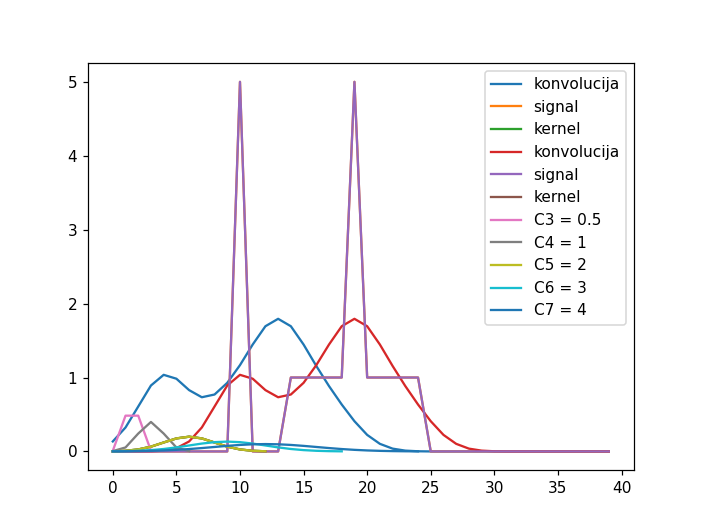

In [7]:
plt.plot(C1, label = "konvolucija")
plt.plot(signal, label = "signal")
plt.plot(kernel, label = "kernel")
plt.legend()
plt.show()

Ali prepoznate obliko jedra <i>kernel</i>? Kakšna je vsota vseh elementov jedra?

In [8]:
print(np.sum(kernel))

0.9999999974


### Odgovor:

Oblika jedra me spominja na Gausov filter. Vsota vseh elementov jedra pa je 0.9999999974.

3. Ponovno izračunajte konvolucijo in izrišite rezultat, vendar tokrat uporabite že vgrajeno Scipy funkcijo

    ``scipy.signal.convolve(signal, kernel, 'same')``

    Poglejte si v Scipy dokumentaciji kaj pomeni parameter ``same``. V čem se ta funkcije razlikuje od vaše implementacije ``simple_convolution``? Kaj je vzrok za razliko?

In [9]:
#import sys
#!{sys.executable} -m pip install scipy
import scipy

In [10]:
C2 = scipy.signal.convolve(signal, kernel, 'same')

In [11]:
plt.plot(C2, label = "konvolucija")
plt.plot(signal, label = "signal")
plt.plot(kernel, label = "kernel")
plt.legend()
plt.show()

### Odgovor:
Moja implementacija začne naraščati že pri 0, med tem ko scipy narašča šele pri 5.

##### same :
The output is the same size as in1, centered with respect to the ‘full’ output.

3. Sedaj si oglejmo zelo pogosto uporabljeno <i>Gaussovo jedro</i>, ki je definirano kot

    \begin{equation}
    g(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp{(-\frac{x^2}{2\sigma^2})}
    \end{equation}

    Pomembna lastnost Gaussovega jedra je, da njegova vrednost postane zelo majhna za $\left|x\right| > 3\sigma$. Zato je tudi jedro ponavadi velikosti $2\cdot3\sigma+1$. Napišite funkcijo ``simple_gauss``, ki ji podate parameter ``sigma``, vrne pa Gaussovo jedro.

Izrišite jedro s $\sigma=2$ in preverite, da je vsota njegovih elementov enaka $1$ ter, da je po obliki podoben zgoraj definiranem jedru ``kernel``. Na isto sliko izrišite še Gaussova jedra z vrednostjo $\sigma = 0.5, 1, 2, 3, 4$.

In [12]:
def simple_gauss(sigma):
    
    l = 2 * 3 * sigma + 1
    l = math.ceil(l)
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma)) * (1 / (np.sqrt(2*np.pi) * sigma))
    return gauss

In [13]:
import math
C3 = simple_gauss(0.5)
C4 = simple_gauss(1)
C5 = simple_gauss(2)
C6 = simple_gauss(3)
C7 = simple_gauss(4)
plt.plot(C3, label = "C3 = 0.5")
plt.plot(C4, label = "C4 = 1")
plt.plot(C5, label = "C5 = 2")
plt.plot(C6, label = "C6 = 3")
plt.plot(C7, label = "C7 = 4")
plt.legend()
plt.show()

In [14]:
print(np.sum(C3))
print(np.sum(C4))
print(np.sum(C5))
print(np.sum(C6))
print(np.sum(C7))

0.9856102917243255
0.9997293592899715
0.9989759025687457
0.9985340009643869
0.9982705350395955


4. Na spodnji sliki sta prikazani dve jedri <i>(a)</i> in <i>(b)</i> ter signal <i>(c)</i>. Skicirajte (ni se potrebno osredotočati na računsko natančnost, pomembno je razumevanje) rezultat konvolucije signala s posameznim jedrom. Po želji lahko konvolucijo s podobnimi dvemi signali tudi implementirate, vendar je pombemno predvsem razumevanje rezultata.

<center>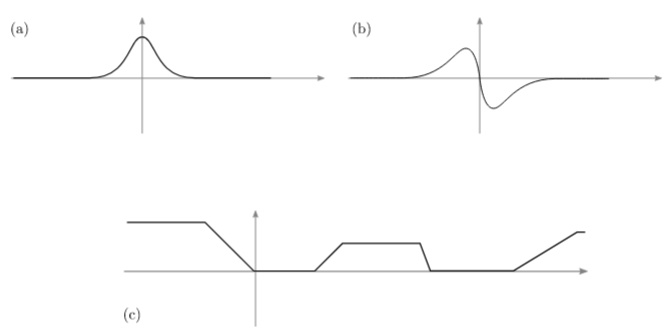</center>

In [15]:
# TO-DO: Prilozite skice

5. Glavna prednost konvolucije napram korelaciji je asociativnost operacije. To nam omogoča, da več jeder najprej konvuliramo med seboj, šele nato pa s sliko. Preverite to lastnost tako, da uporabite zgoraj definirani signal ``signal`` ter ga nato konvulirate z dvema jedroma, najprej z Gaussovim jedrom $k_1$ s parametrom $\sigma=2$, nato pa z jedrom $k_2 = [0.1, 0.6, 0.4]$. V drugem poskusu zamenjajte vrstni red jeder, nato pa preizkusite še najprej izračunati konvolucijo obeh jeder $k_1 * k_2$, rezultat pa konvulirajte s signalom. Izrišite vse tri rezultate in jih primerjajte.

<center>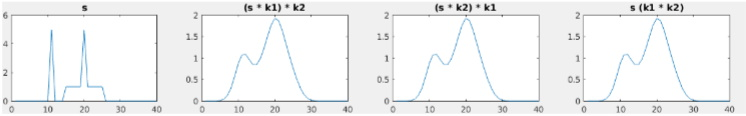</center>

In [16]:
signal = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
k1 = simple_gauss(2)
k2 = [0.1, 0.6, 0.4]

In [17]:
prvi = np.convolve(signal, k1)
prvi = np.convolve(prvi, k2)

In [18]:
drugi = np.convolve(signal, k2)
drugi = np.convolve(drugi, k1)

In [19]:
tretji = np.convolve(k1, k2)
tretji = np.convolve(signal, tretji)

<IPython.core.display.Javascript object>


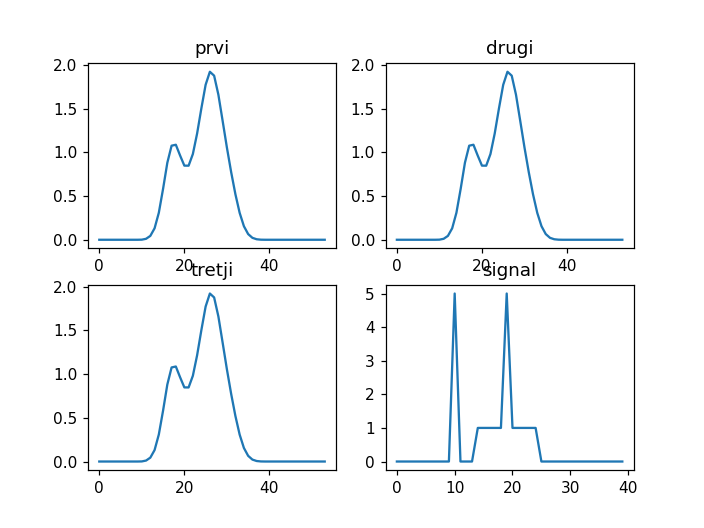

Text(0.5, 1.0, 'signal')

In [20]:
'''
plt.plot(prvi, label = "prvi")
plt.plot(drugi, label = "drugi")
plt.plot(tretji, label = "tretji")
plt.legend()
plt.show()
'''

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(prvi)
axs[0, 0].set_title("prvi")
axs[1, 0].plot(tretji)
axs[1, 0].set_title("tretji")
axs[0, 1].plot(drugi)
axs[0, 1].set_title("drugi")
axs[1, 1].plot(signal)
axs[1, 1].set_title("signal")

6. Kot ste to slišali že na predavanjih, je pomembna lastnost Gaussovega jedra separabilnost v večih dimenzijah. To pomeni, da dobimo enak rezultat, če enkrat filtriramo z 2D jedrom ali če filtriramo najprej po eni in nato po drugi dimenziji. Torej lahko (počasno) $n$D filtriranje prevedemo na sekvenco hitrih $1$D filtriranj.

    Napišite funkcijo ``gauss_filter``, ki generira Gaussov filter in ga nato aplicira na $2$D sliko. Za izvedbo funkcije v $2$D prostoru uporabite OpenCV funkcijo ``cv2.filter2D``, oziroma funkcijo ``cv2.sepFilter2D``, ko uporabljate seperabilna jedra. Upoštevajte dejstvo, da je jedro separabilno, zato generirajte $1$D jedro, z njim najprej filtrirajte sliko po eni dimenziji, nato pa po drugi dimenziji preprosto tako, da jedro transponirate pred konvolucijo. Preizkusite filter v spodnji kodi, ki naloži dve pokvarjeni varianti slike <i>lena.png</i> -- <i>lena_gauss.png</i> in <i>lena_sp.png</i>, kjer je bila prva varianta pokvarjena z Gaussovim šumom, druga pa s šumom sol-in-poper. Kateri šum Gaussov filter bolje odstrani?

In [148]:
def gauss_filter(img, sigma):
    
    kernel1 = simple_gauss(sigma)
    identity = cv2.filter2D(src=img, ddepth=-1, kernel=kernel1)
    kernel2 = np.transpose(kernel1)
    identity = cv2.filter2D(src=img, ddepth=-1, kernel=kernel2)
    


    #A_noise_gauss = scipy.ndimage.gaussian_filter(img, sigma)
    return identity

<IPython.core.display.Javascript object>


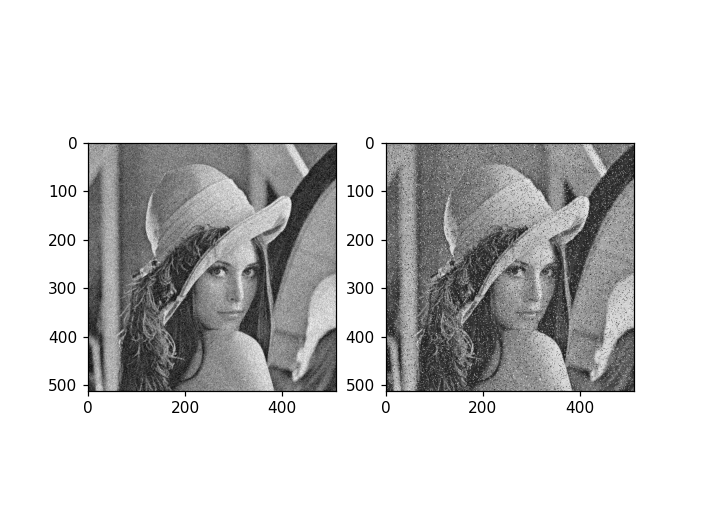

<IPython.core.display.Javascript object>


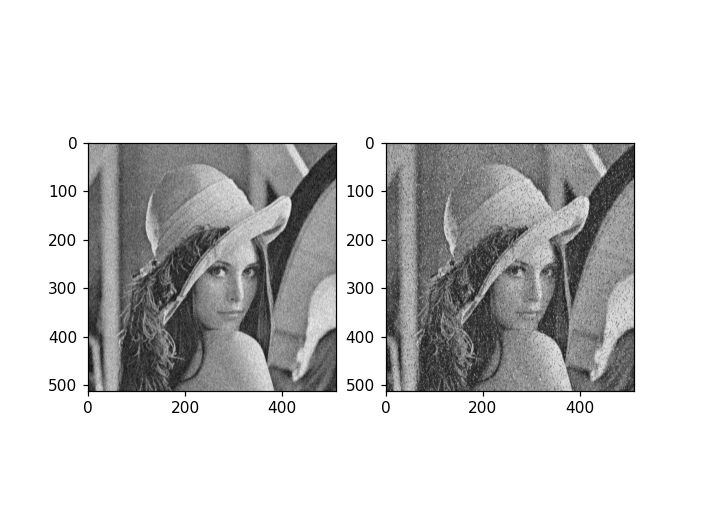

<IPython.core.display.Javascript object>


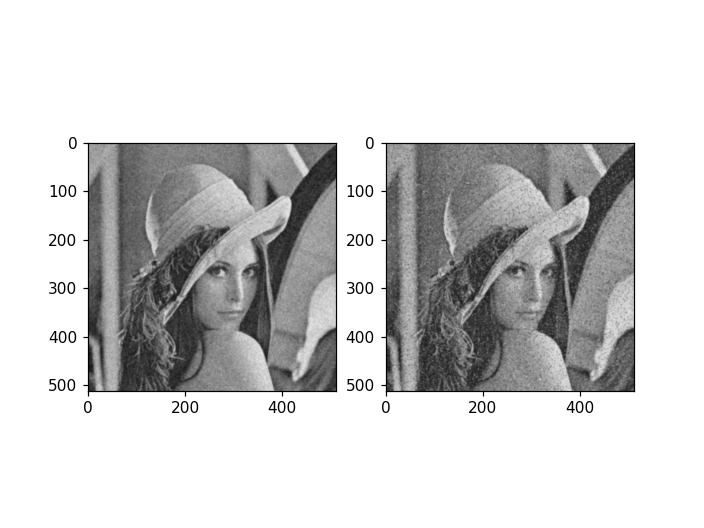

In [149]:
lena_gauss = cv2.imread('material/lena_gauss.png')
lena_sp = cv2.imread('material/lena_sp.png')

# TO-DO: Filtrirajte sliki z Gaussovim jedrom

'''
A_noise_gauss = scipy.ndimage.gaussian_filter(lena_gauss, 1)
A_noise_sp = scipy.ndimage.gaussian_filter(lena_sp, 1)


# TO-DO: Izrišite rezultate
plt.figure()
plt.subplot(121)
plt.imshow(A_noise_gauss, cmap='gray')
plt.subplot(122)
plt.imshow(A_noise_sp, cmap='gray')
 
'''

plt.figure()
plt.subplot(121)
plt.imshow(lena_gauss, cmap='gray')
plt.subplot(122)
plt.imshow(lena_sp, cmap='gray')
    
A_g_filtered = gauss_filter(lena_gauss, 1)
A_s_filtered = gauss_filter(lena_sp, 1)

plt.figure()
plt.subplot(121)
plt.imshow(A_g_filtered, cmap='gray')
plt.subplot(122)
plt.imshow(A_s_filtered, cmap='gray')

####

A_noise_gauss = scipy.ndimage.gaussian_filter(lena_gauss, 1)
A_noise_sp = scipy.ndimage.gaussian_filter(lena_sp, 1)

plt.figure()
plt.subplot(121)
plt.imshow(A_noise_gauss, cmap='gray')
plt.subplot(122)
plt.imshow(A_noise_sp, cmap='gray')


7. <b>$\star$ (5 točk)</b> Še en uporaben filter je filter ostrenja, ki je definiran kot

\begin{equation}
k = \begin{bmatrix}
   0 & 0 & 0  \\
   0 & 2 & 0  \\
   0 & 0 & 0  \\
\end{bmatrix}
- \frac{1}{9}
\begin{bmatrix}
   1 & 1 & 1 \\
   1 & 1 & 1 \\
   1 & 1 & 1 \\
\end{bmatrix}
\end{equation}

Implementirajte filter ter ga preizkusite na sliki iz datoteke <i>museum.jpg</i>. Kaj opazite? Poskusite filter na sliki zaporedno aplicirati večkrat ter opazujte spremembe.

In [23]:
17/9

1.8888888888888888

In [24]:
def sharpen_filter(img):
    k = np.array([[-1/9, -1/9, -1/9], [-1/9, 17/9, -1/9], [-1/9, -1/9, -1/9]])
    identity = cv2.filter2D(src=img, ddepth=-1, kernel=k)
    return identity

<IPython.core.display.Javascript object>


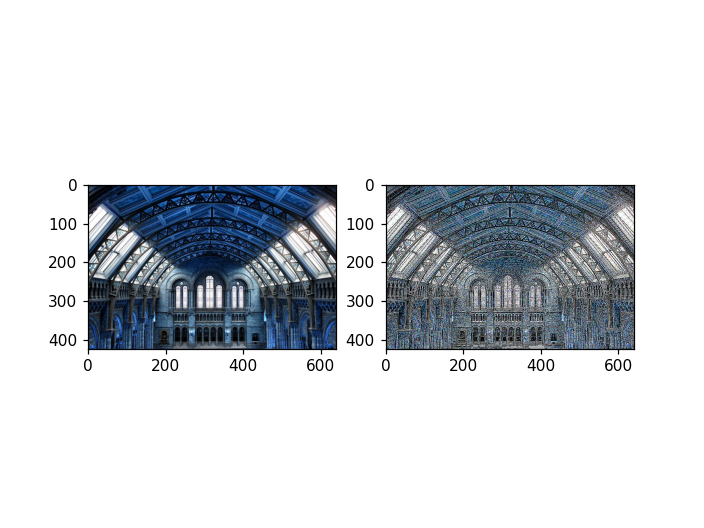

In [25]:
muzej = cv2.imread('material/museum.jpg')
filtriran = sharpen_filter(muzej)
for i in range(5):
    filtriran = sharpen_filter(filtriran)

plt.figure()
plt.subplot(121)
plt.imshow(muzej, cmap='gray')
plt.subplot(122)
plt.imshow(filtriran, cmap='gray')


8. Dopolnite implementacijo nelinearnega filter, ki ste ga obravnavali na predavanjih - <i>median filter</i>. Medtem, ko Gaussov filter izračuna lokalno uteženo povprečno vrednost v signalu, medianin filter lokalne vrednosti v signalu (t.j., vrednosti znotraj okna filtra) uredi po velikosti in vzame vrednost, ki je na sredini urejene množice (t.j., mediano).

In [26]:
def simple_median(f, w):
   
    N = int(np.ceil((w - 1) / 2))
    tmp = np.zeros ((len (f), w), dtype=f.dtype)
    tmp[:,N] = f
    for i in range (N):
        j = N - i
        tmp[j:,i] = f[:-j]
        tmp[:j,i] = f[0]
        tmp[:-j,-(i+1)] = f[j:]
        tmp[-j:,-(i+1)] = f[-1]
        f_filtered = np.median (tmp, axis=1)
    return f_filtered
    

9. Uporabite spodnjo funkcijo, ki generira $1$D stopnico, jo pokvari s šumom sol-in-poper, in nato zažene vaš Gaussov in medianin filter. Nastavite parametre filtrov tako, da bo rezultat filtriranja najboljši. Kateri filter se obnese bolje?

<IPython.core.display.Javascript object>


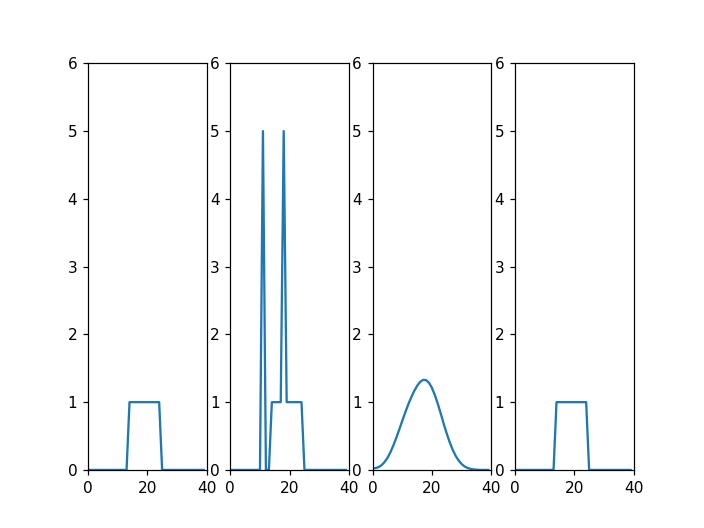

In [27]:
# signal
x = np.concatenate((np.zeros(14), np.ones(11), np.zeros(15)))
# pokvarjeni signal
xc = np.copy(x)
xc[11] = 5
xc[18] = 5

plt.figure()

plt.subplot(141)
plt.xlim([0, 40])
plt.ylim([0, 6])
plt.plot(x)

plt.subplot(142)
plt.xlim([0, 40])
plt.ylim([0, 6])
plt.plot(xc)

plt.subplot(143)
plt.xlim([0, 40])
plt.ylim([0, 6])
gas = gauss_filter(xc, 4)
#gas = scipy.ndimage.gaussian_filter(xc, 3)
plt.plot(gas)

# TO-DO: plot simple gauss

plt.subplot(144)
plt.xlim([0, 40])
plt.ylim([0, 6])
sm = simple_median(xc, 3)
plt.plot(sm)

# TO-DO: plot simple median


10. <b>$\star$ (5 točk)</b> Implementirajte $2$D verzijo medianinega filtra in jo preizkusite na sliki, ki je popačena z Gaussovim šumom ali šumom sol-in-poper. Primerjajte rezultate s filtriranjem z Gaussovim šumom za različne stopnje šuma, pa tudi za različne velikosti filtrov. Primerjajte (ocenite analitično) kolikša je računska kompleksnost Gaussovega filtra in kolikšna je kompleksnost medianinega filtra v $O(\cdot)$ notaciji, če v mediani uporabimo <i>quicksort</i> za sortiranje.

<center>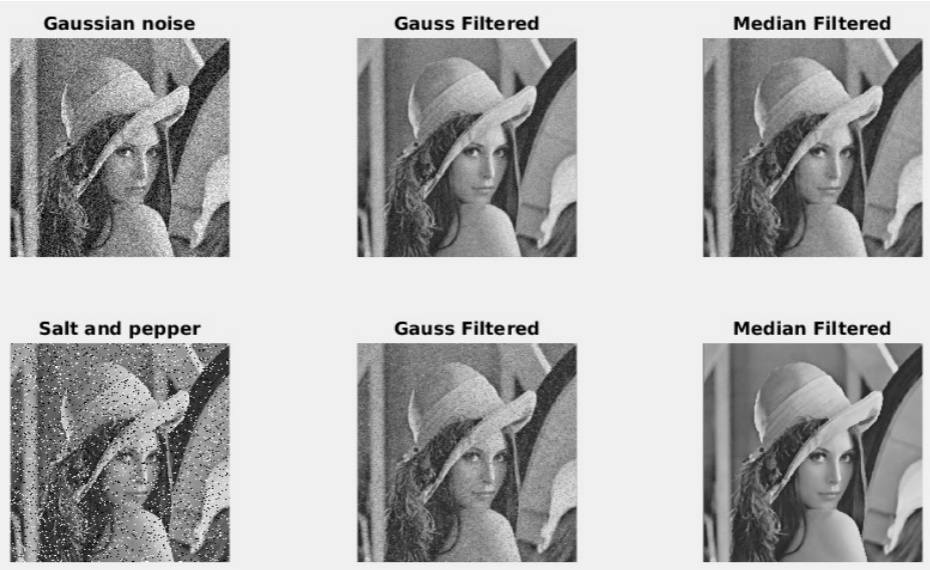</center>

In [156]:
def median_filter(img, f, w):
    
    kernel1 = simple_median(f, w)
    identity = cv2.filter2D(src=img, ddepth=-1, kernel=kernel1)
    kernel2 = np.transpose(kernel1)
    identity = cv2.filter2D(src=img, ddepth=-1, kernel=kernel2)
    
    #R1 = cv2.sepFilter2D(src=img, ddepth=cv2.CV_64F, kernelX=kernel1, kernelY=kernel2)

    return identity

<IPython.core.display.Javascript object>


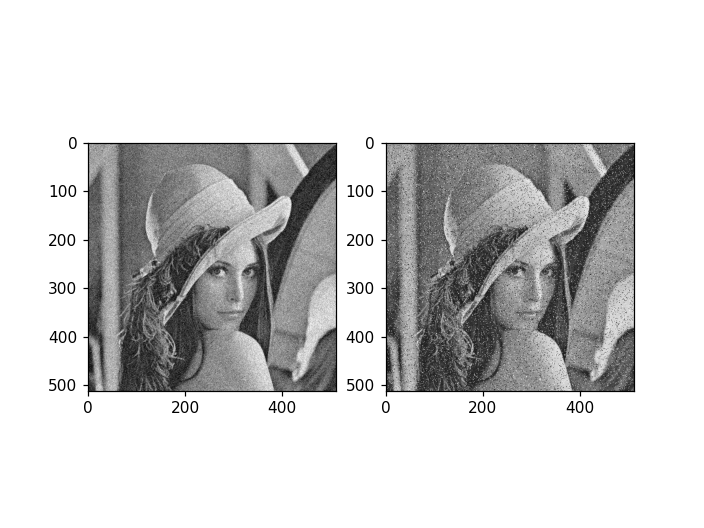

<IPython.core.display.Javascript object>


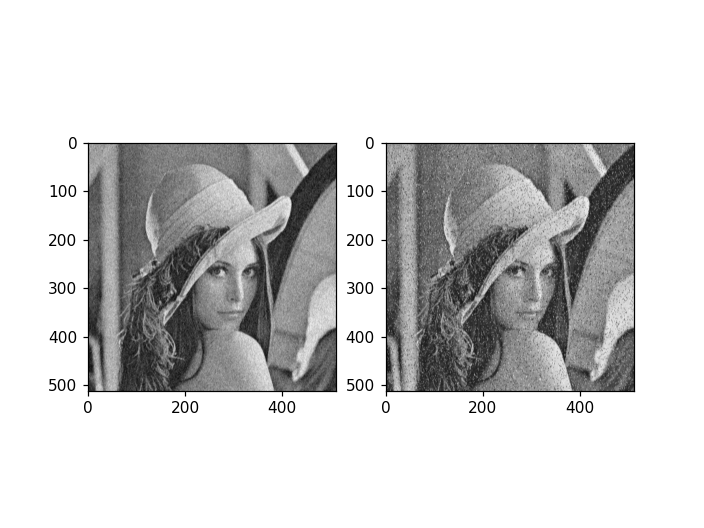

<IPython.core.display.Javascript object>


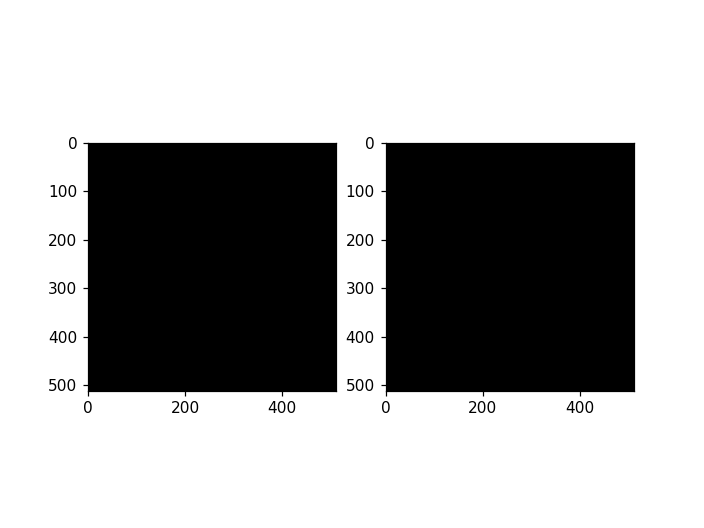

In [163]:
lena_gauss = cv2.imread('material/lena_gauss.png')
lena_sp = cv2.imread('material/lena_sp.png')


lena_gauss = cv2.cvtColor(lena_gauss,cv2.COLOR_BGR2GRAY)
lena_sp = cv2.cvtColor(lena_sp,cv2.COLOR_BGR2GRAY)

x = np.ones(512)
xc = np.copy(x)
xc[11] = 5
xc[18] = 5

plt.figure()
plt.subplot(121)
plt.imshow(lena_gauss, cmap='gray')
plt.subplot(122)
plt.imshow(lena_sp, cmap='gray')
    
A_g_filtered = gauss_filter(lena_gauss, 1)
A_s_filtered = gauss_filter(lena_sp, 1)

plt.figure()
plt.subplot(121)
plt.imshow(A_g_filtered, cmap='gray')
plt.subplot(122)
plt.imshow(A_s_filtered, cmap='gray')


A_med_gauss = median_filter(lena_gauss, x, 3)
A_med_sp = median_filter(lena_sp, x, 3)

plt.figure()
plt.subplot(121)
plt.imshow(A_med_gauss, cmap='gray')
plt.subplot(122)
plt.imshow(A_med_sp, cmap='gray')


11. Zadnji segment v tej nalogi je posvečen odvajanju slik z uporabo konvolucije. Odvodi slike so pomembni kot indikator spremembe intenzitete, na njih pa temeljijo algoritmi za detekcijo črt in kotov. Numerično gre pri odvajanju za računanje razlike dveh zaporednih vrednosti signala, kar zapišemo tudi kot konvolucijo z jedrom $[-1, 1]$. Ker jedro s sodim številom elementov povzroči premik signala za pol elementa, se v praksi uporablja liha verzija filtra $[-1, 0, 1]$.

    Slabost neposrednega odvajanja slike v neki točki je v tem, da zaradi prisotnosti šuma lokalne spremembe niso jasne in so tudi ocene odvodov šumne. V praksi zato sliko najprej zgladimo z majhnim filtrom, $I_b(x, y) = G(x, y) * I(x, y)$ in šele nasto izračunamo odvod. Za glajenje pogosto uporabimo Gaussovo jedro, zaporedje odvajanja in konvolucije Z Gaussovim jedrom pa lahko zaradi lastnosti konvolucije združimo v konvolucijo z odvodom Gaussovega jedra.

    a. Implementirajte funkcijo za izračun odvoda $1$D Guassovega jedra. Enačba odvoda Gaussovega jedra se glasi
    
    \begin{equation}
        \frac{d}{dx}g(x) = \frac{d}{dx}\frac{1}{\sqrt{2\pi}\sigma}\exp{\left(-\frac{x^2}{2\sigma^2}\right)} = -\frac{1}{\sqrt{2\pi}\sigma^3}x\exp{\left(-\frac{x^2}{2\sigma^2}\right)}
    \end{equation}
    
    Jedro implementirajte v funkciji ``simple_gaussdx(sigma)``. Kot smo normalizirali diskretizirano Gaussovo jedro, je tudi priporočljivo, da normaliziramo odvod jedra. Ker je odvod Gaussovega jedra liha funkcija, ga normaliziramo tako, da je vsota absolutnih vrednosti elementov vsake od polovic enaka 1. Torej moramo jedro deliti z $\frac{1}{2}\sum{\left|g_x(x)\right|}$.
    
    Slika je $2$D signal, zato se na njej lahko izračuna dva parcialna odvoda, odvod po $x$ in odvod po $y$. Jedro odvoda po $y$ je transponirano jedro odvoda po $x$. Svojo implementacijo razširite še na $2$D signal.

In [79]:
def simple_gaussdx(sigma):
    l = 2 * 3 * sigma + 1
    l = math.ceil(l)
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / (2 * np.square(sigma))) * (-1 / (np.sqrt(2*np.pi) * np.power(sigma, 3))) * ax
    gauss = np.true_divide(gauss, 0.5)
    return gauss

   b. Lastnosti filtra lahko analiziramo preko tako imenovanega impulznega odziva filtra $f(x, y)$, ki je definiran kot konvolucija. Dirac-ove $\delta(x, y)$ delte z jedrom $f(x, y)$: $f(x, y)*\delta(x, y)$. Zato najprej naredite sliko, ki ima vse vrednosti, razen centralnega elementa, enake nič

Sedaj generirajte spodaj podani $1$D jedri $G$ in $D$

In [127]:
I = np.zeros((25, 25), dtype=np.uint8)
I[12, 12] = 255

In [135]:
sigma = 5.0
G = simple_gauss(sigma)
Gt = np.transpose(G)
D = simple_gaussdx(sigma)
Dt = np.transpose(D)

In [144]:
R1 = cv2.sepFilter2D(src=I, ddepth=cv2.CV_64F, kernelX=G, kernelY=Dt)
R2 = cv2.sepFilter2D(src=I, ddepth=cv2.CV_64F, kernelX=D, kernelY=Gt)
R3 = cv2.sepFilter2D(src=I, ddepth=cv2.CV_64F, kernelX=G, kernelY=Gt)
R4 = cv2.sepFilter2D(src=I, ddepth=cv2.CV_64F, kernelX=Gt, kernelY=D)
R5 = cv2.sepFilter2D(src=I, ddepth=cv2.CV_64F, kernelX=Dt, kernelY=G)

<IPython.core.display.Javascript object>


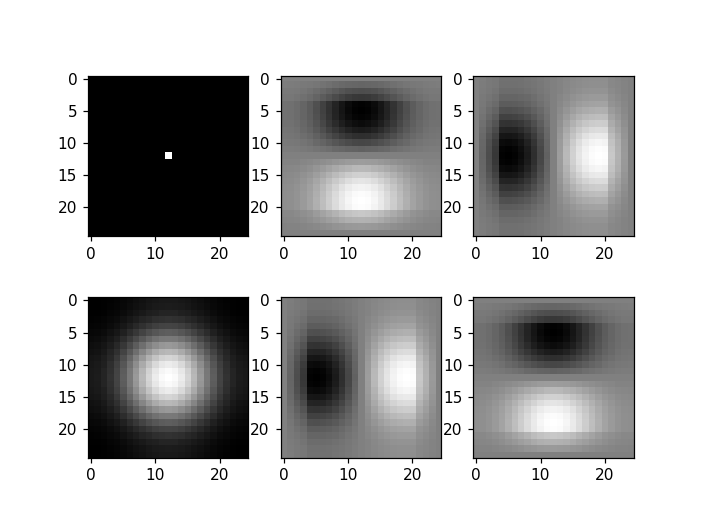

In [145]:
plt.figure()
plt.subplot(231)
plt.imshow(I, cmap='gray')
plt.subplot(232)
plt.imshow(R1, cmap='gray')
plt.subplot(233)
plt.imshow(R2, cmap='gray')
plt.subplot(234)
plt.imshow(R3, cmap='gray')
plt.subplot(235)
plt.imshow(R5, cmap='gray')
plt.subplot(236)
plt.imshow(R4, cmap='gray')

Kaj se zgodi, če aplicirate naslednje operacije na sliko $I$? Ali je zaporedje ukazov pomembno?

* Najprej konvolucija z G in potem konvolucija z G'.
* Najprej konvolucija z G in potem konvolucija z D'.
* Najprej konvolucija z D in potem konvolucija z G'.
* Najprej konvolucija z G' in potem konvolucija z D.
* Najprej konvolucija z D' in potem konvolucija z G.

Izrišite si slike impulznih odzivov.

<br>
<center>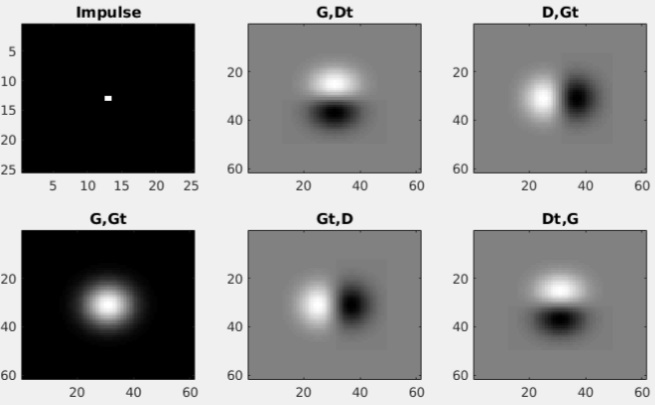</center>

## Naloga 2: Detekcija robov in kotov

Robove in kote iščemo tako, da analiziramo lokalne spremembe sivinskih nivojev v sliki, matematično to pomeni, da računamo <i>odvode</i> slike, kar ste si pogledali v prejšnji nalogi.

1. <b>$\star$ (5 točk)</b> Če želite bolje spoznati delovanje algoritma, implementirajte funkcijo ``gradient_magnitude``, ki za vhod vzame sivinsko sliko $I$, vrne pa matriko magnitud odvodov $I_\mathrm{mag}$ in matriko kotov odvodov $I_\mathrm{dir}$ vhodne slike. Magnitude izračunamo po formuli $m(x,y) = \sqrt{\left( I_x(x, y)^2 + I_y(x, y)^2\right)}$, kote pa po formuli $\Theta(x, y) = \mathrm{arctan}\left(\frac{I_y(x, y)}{I_x(x, y)}\right)$. Zaradi učinkovitosti je pomembno, da uporabite matrično obliko operacij in ne <i>for</i> zanke. Namig: Pri izračunu kotov se lahko ognete problemom deljenja z nič, če uporabite funkcijo ``np.arctan2``, ki sama poskrbi za take primere. Rezultate vseh treh funkcij preizkusite na sliki ``museum.jpg`` in izrišite rezultate.

<center>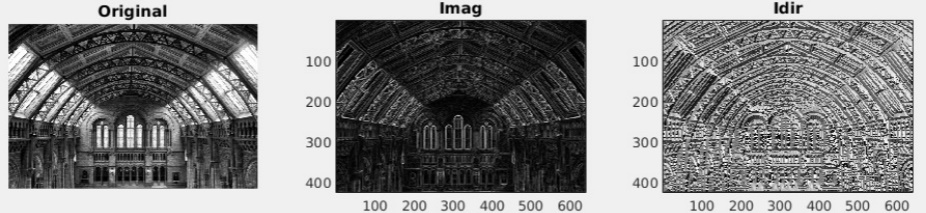</center>

In [33]:
def gradient_magnitude(I, sigma):
    # TO-DO
    pass

2. <b>$\star$ (5 točk)</b> Preprost detektor robov lahko dobimo že, če sliko magnitud gradientov $I_\mathrm{mag}$ upragujemo s pragom $\theta$. Napišite funkcijo ``edges_simple``, ki za sivinsko vhodno sliko vrne binarno sliko robov $I_e$, ki označuje magnitude večje od predpisane pragovne vrednosti. Implementirano funkcijo preizkusite na sliki ``museum.jpg`` in si izrišite rezultat za nekaj vrednosti parametra $\theta$.

In [34]:
def edges_simple(I, theta):
    # TO-DO
    pass

3. Na predavanjih ste spoznali Cannyjev detektor robov, ki je eden on najbolj razširjenih detektorjev robov v slikah. V OpenCV knjižnici je implementiran v sklopu funkcije ``cv2.Canny``. Preučite nabor njegovih vhodnih parametrov in preizkusite delovanje na živi sliki zajeti s pomočjo spletne kamere. Izberite si poljuben predmet in nastavite parametre tako, da se bo njegov obris najbolje videl.

In [35]:
cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

# While zanka za posodabljanje pridobljene slike do prekinitve
while(True):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break

    # TO-DO: pridobite sliko robov
    edges = cv2.Canny(frame,100,200)
    
    # Prikazi sliko robov - edges
    cv2.imshow('frame', edges)
    
    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()

4. Z odvodi lahko detektiramo tudi druge nizko-nivojske strukture v sliki, recimo kote. Na predavanjih ste obravnavali Harrisov algoritem, ki, podobno kot algoritmi za detekcijo črt, temelji na prvih odvodih slike. V OpenCV knjižnici je implementiran v sklopu funkcije ``cv2.cornerHarris``. Preučite nabor njegovih vhodnih parametro in preizkusite delovanje na živi sliki zajeti s pomočjo spletne kamere. Poskusite nastaviti parametre tako, da boste detektirali čimveč kotov na npr. šahovnici, su-do-ku polju, ...

In [36]:
cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

# While zanka za posodabljanje pridobljene slike do prekinitve
while(True):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break

    # TO-DO
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    dst = cv2.dilate(dst,None)
    
    # Oznacimo detektirane kote v izvorni sliki (frame) z rdecimi pikami
    # dst - seznam tock, ki ga vrne funkcija cv2.cornerHarris
    frame[dst > 0.01 * dst.max()] = [0, 0, 255]
    # Izrisimo rezultat
    cv2.imshow('frame', frame)
    
    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()

## Naloga 3: Detekcija črt in krogov

Ko imamo za sliko detektirane robove, lahko na podlagi njih detektiramo višje-nivojske strukture kot so črte/premice in krogi. Temu so namenjene različne izpeljanke <a href="https://en.wikipedia.org/wiki/Hough_transform">Hughovega algoritma</a>. Najprej boste na kratko obnovili bistvo Haughovega pristopa za iskanje premic v sliki. Za več informacij poglejte zapiske s predavanj, kot tudi spletne aplikacije (<a href="https://homepages.inf.ed.ac.uk/rbf/HIPR2/houghdemo.htm">Hough Transform</a>, <a href="https://www.markschulze.net/java/hough/">Circular Hough Transform</a>), ki demonstrirajo delovanje Houghovega transforma.

Zamislimo si neko točko $p_0 = (x_0, y_0)$ na sliki. Če vemo, da je enačba premice $y = mx+c$, katere vse premice potekajo skozi točko $p_0$? Odgovor je preprost: vse premice, katerih parametra $m$ in $c$ ustrezata enačbi $y_0 = mx_0 + c$. Če si fiksiramo vrednosti $(x_0, y_0)$, potem zadnja enačba opisuje zopet premico, vendar tokrat v prostoru $(m, c)$. Če si zdaj zamislimo novo točko $p_1 = (x_1, y_1)$, njej prav tako ustreza premica v prostoru $(m, c)$, in ta premica se seka s prejšnjo v neki točki $(m', c')$. Točka $(m', c')$ pa ravno ustreza parametrom premice v $(x, y)$ prostoru in povezuje točki $p_0$ in $p_1$.

1. Na papirju rešite naslednji problem z uporabo Houghove transformacije: V $2$D prostoru imamo podane štiri točke $(0, 0)$, $(1, 1)$, $(1, 0)$, $(2, 2)$. Določite enačbe premic, ki potekajo skozi vsaj dve točki. Poslikajte/skenirajte rešitev in jo dodajte v Jupyter Notebook.

In [37]:
# TO-DO: Prilozite sliko/scan resitve

2. Na papirju z uporabo Houghovega algoritma določite parametre premice, ki poteka čez točki $(10, 1)$ in $(11, 0)$.

In [38]:
# TO-DO: Prilozite sliko/scan resitve

Če želimo poiskati vse premice v sliki z algoritmom, moramo naš postopek nekoliko preoblikovati, nimamo namreč na voljo neskončnega pomnilnika, ki bi ga potrebovali za izris premic, kot smo to naredili v zgornjih nalogah. Parametrični prostor $(m, c)$ najprej kvantiziramo v matriko <i>akumulatorjev</i>. Za vsak slikovni element, ki je kandidat za rob v vhodni sliki, <i>narišemo</i> pripadajočo premico v prostoru $(m, c)$ in povečamo vrednost akumulatorjev preko katerih ta premica poteka za $1$. Vsi slikovni elementi, ki ležijo na isti premici v vhodni sliki bodo generirali premice v prostoru $(m, c)$, ki se bodo sekale v isti točki in tako poudarile vrednost pripadajočega akumulatorja. To pomeni, da lokalni maximumi v $(m, c)$ prostoru določajo premice, na katerih leži veliko slikovnih elementov v $(x, y)$ prostoru.

V praksi je zapis premice v odvistnosti od $m$ in $c$ neučinkovit, še posebej, ko gre za navpične črte, saj takrat postane $m$ neskončen. Temu problemu se preprosto ognemo tako, da premico parametriziramo s polarnimi koordinatami.

\begin{equation}
x\cos{\left(\theta\right)} + y\sin{\left(\theta\right)} = \rho
\end{equation}

Postopek iskanja parametrov z akumulatorji je nespremenjen, razlika je samo v tem, da točka v $(x, y)$ prostoru generira namesto premice sinusoido v prostoru $(\theta, \rho)$. Za točki $(1, 1)$ ter $(\frac{1}{2}, -1)$ sta ustrezni krivulji prikazani na spodnji sliki.

<br>
<center>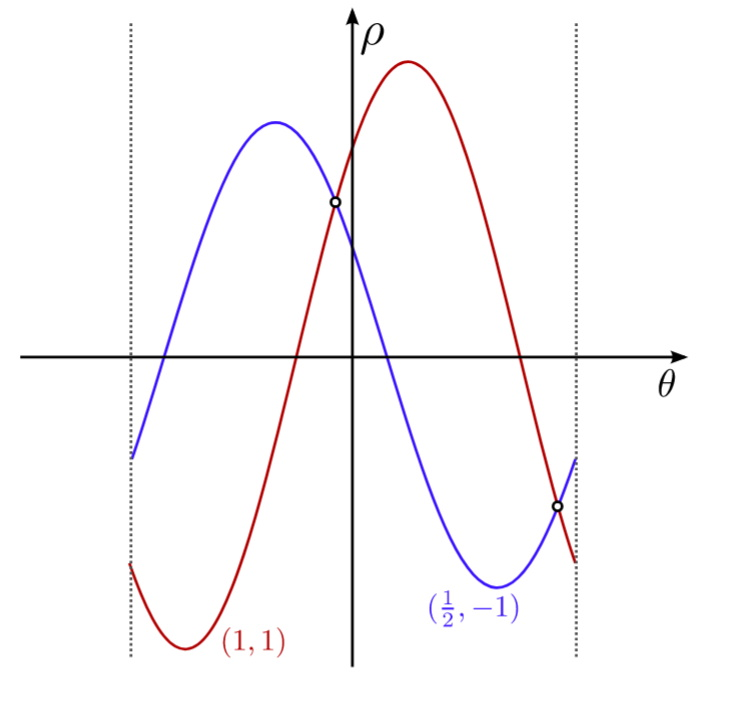</center>

1. Da bi bolje razumeli, kako se Houghov algiritem izvaja v praksi, ga boste delno implementirali. Pri tam vam bo v pomoč spodnja koda, ki za posamezno točko roba v akumulatorsko polje doda eno krivuljo.

In [39]:
# Resolucija akumulatorskega polja:
def isci (x, y):
    bins_theta = 300
    bins_rho = 300

    
    max_rho = np.sqrt(246944)
    
    # max_rho = 100  # Navadno je to diagonala slike

    val_theta = np.linspace(-90, 90, bins_theta) / 180 * np.pi # vrednosti theta
    val_rho = np.linspace(-max_rho, max_rho, bins_rho)
    A = np.zeros((bins_rho, bins_theta))

    # Primer za tocko (50, 90)
    # x = 50
    # y = 90
    rho = x * np.cos(val_theta) + y * np.sin(val_theta) # Izracunajmo rho za vse thete
    bin_rho = np.round((rho + max_rho) / (2 * max_rho) * len(val_rho))

    for i in range(bins_theta):
        if bin_rho[i] >= 0 and bin_rho[i] <= bins_rho - 1:
            A[int(bin_rho[i]), i] += 1
    return A
    
    

In [40]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def risi(img):
    edges = cv.Canny(img,100,200)
    tmp = np.zeros((300, 300))

    result = np.where(edges == 255)
    for i in range(len(result[0])):
        A = isci(result[0][i], result[1][i])
        tmp = np.add(tmp, A)

    plt.figure()
    plt.imshow(tmp)

2. Razširite zgornjo kodo, da iz slike robov (le-to lahko pridobite z uporabo Cannyjevega detektorja robov), inkrementalno izračunajte vrednosti akumulatorske matrike tako, da za vsako točko, ki je rob, dorišete ustrezno krivuljo. Končni akumulator nato prikažite na zaslonu. Za testiranje uporabite sintetični sliki iz datotek ``oneline.png`` in ``rectangle.png``. Pri tem bodite pozorni na nastavitev vrednosti spremenljivke ``max_rho``, ki se spreminja glede na velikost slike.

<br>
<center>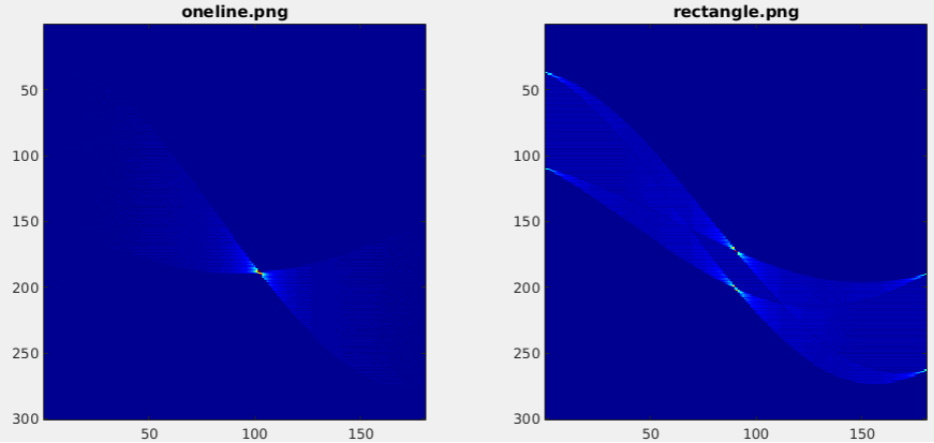</center>

<IPython.core.display.Javascript object>


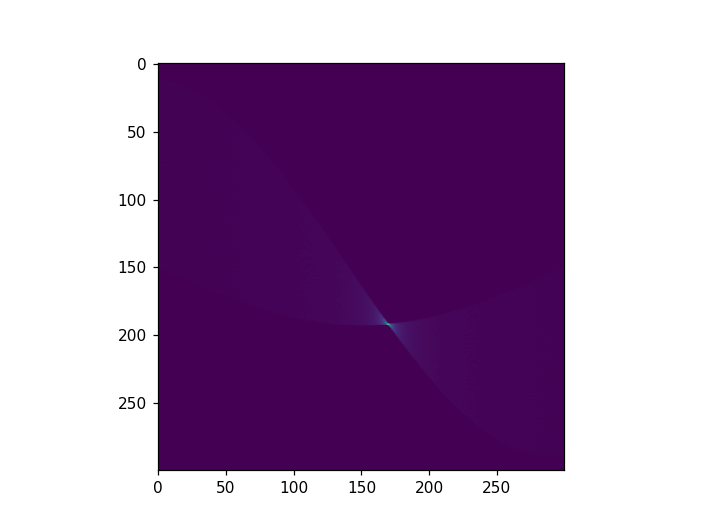

<IPython.core.display.Javascript object>


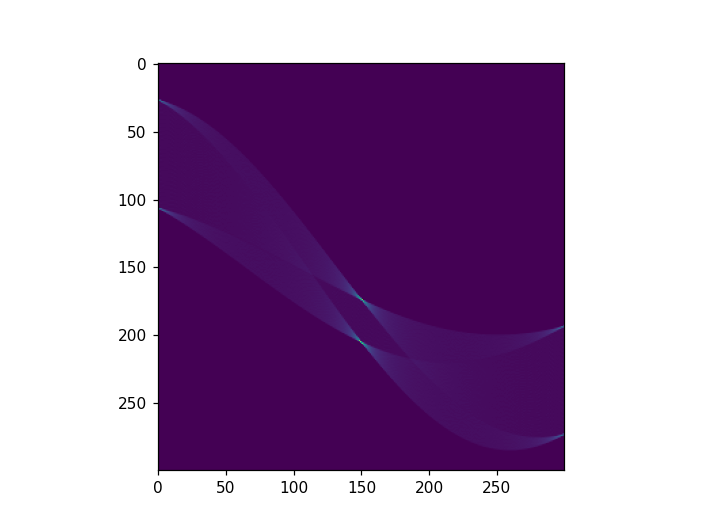

In [41]:
img1 = cv.imread('material/oneline.png',0)
img2 = cv.imread('material/rectangle.png',0)

risi(img1)
risi(img2)

3. Kot je bilo rečeno, algoritma za detekcijo premic ne boste implementirali v celoti, zato uporabite raje v nadaljevanju že implementirano OpenCV funkcijo ``cv2.HoughLinesP``.

    Naložite sliki iz datotek ``skyscraper.jpg`` in ``pier.jpg``. Sliki spremenite v sivinski in na njej najprej detektirajte robove s pomočjo funkcije ``cv2.Canny``, nato pa detektirajte črte z uporabo funkcije ``cv2.HoughLinesP``. Prikažite rezultate ter preizkusite različne nabore parametrov algoritma detekcije robov ter detekcije črt, npr. spremenite parameter $\sigma$ v detekciji črt ali število celic akumulatorja, da dobite rezultate, ki so podobni ali boljši od rezultatov na spodnji sliki. Za izris črt uporabite funkcijo ``cv2.line`` znotraj <i>for</i> zanke.
    
<br>
<center>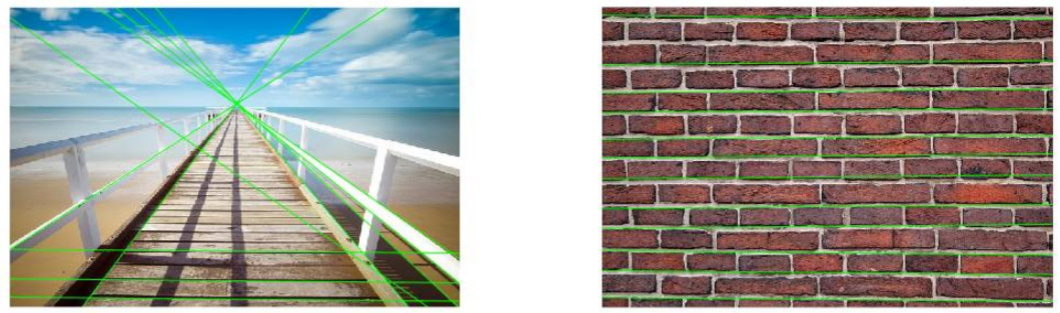</center>

<IPython.core.display.Javascript object>


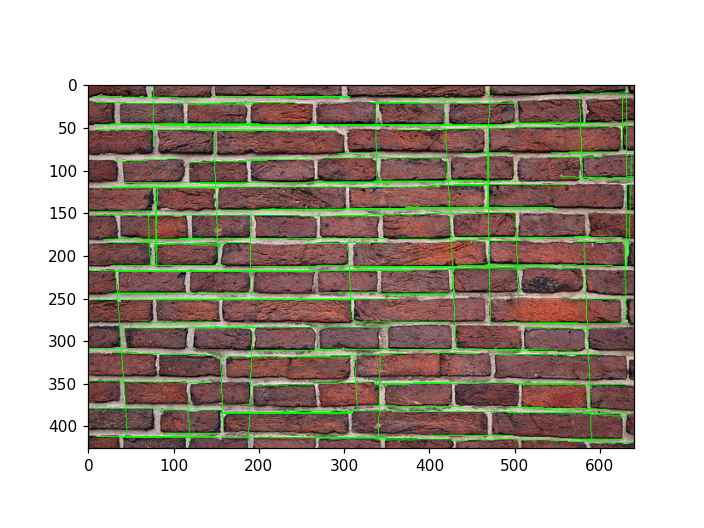

<IPython.core.display.Javascript object>


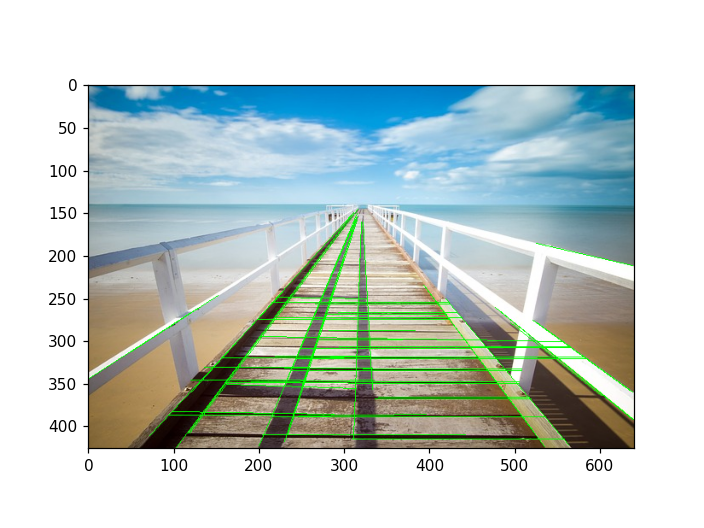

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



img1 = cv2.imread('material/bricks.jpg')
img2 = cv2.imread('material/pier.jpg')


gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

edges1 = cv2.Canny(gray1,400,700)
edges2 = cv2.Canny(gray2,300,500)

'''
plt.figure()
plt.imshow(edges1)
plt.figure()
plt.imshow(edges2)
'''

lines1 = cv2.HoughLinesP(edges1, 1, np.pi / 180, 50, None, 50, 40)
lines2 = cv2.HoughLinesP(edges2, 1, np.pi / 180, 50, None, 100, 50)

for i in range(len(lines1)):
    start_point = (lines1[i][0][0], lines1[i][0][1])
    end_point = (lines1[i][0][2], lines1[i][0][3])
    color = (0, 255, 0)
    img1 = cv2.line(img1, start_point, end_point, color, 1)
    
for i in range(len(lines2)):
    start_point = (lines2[i][0][0], lines2[i][0][1])
    end_point = (lines2[i][0][2], lines2[i][0][3])
    color = (0, 255, 0)
    img = cv2.line(img2, start_point, end_point, color, 1)


img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    
plt.figure()
plt.imshow(img_rgb1)

plt.figure()
plt.imshow(img_rgb2)


Ko dosežete zadovoljive rezultate preizkusite delovanje svojega algoritma še na <i>živi</i> sliki, t.j. sliki pridobljeni iz spletne kamere. Delovanje detekcije črt preizkusite s pomočjo npr. su-do-ku polja, črt v zvezku itd.

In [43]:
cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

# While zanka za posodabljanje pridobljene slike do prekinitve
while(True):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break

    # TO-DO: Pretvorite sliko v sivinsko
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray,400,700)
    
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 40)
    
    # TO-DO: Detektirajte robove na sliki
    
    # TO-DO: Na sliki robov detektirajte črte
    
    # Prikazite detektirane črte
    # lines - seznam tock crt, ki nam jih vrne funkcija cv2.HoughLinesP
    if lines is not None:
        for i in range(len(lines)):
            for x1, y1, x2, y2 in lines[i]:
                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    cv2.imshow('frame', frame)
    
    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()

Sedaj si bomo pogledali še, kako se Houghova transformacija uporabi za detekcijo krogov. Postopek je podoben, kot v primeru detekcije črt, le da imamo v splošnem pri krožnicah tri parametre: dva za center ter enega za radij.

Zamislimo si neko točko $p_0 = (x_0, y_0)$ na sliki. Če vemo, da je enačba krožnice $r^2 = (x-x_c)^2 + (y - y_c)^2$, katere vse krožnice potekajo skozi točko $p_0$? Vse krožnice, katerih parametri $x_c$, $y_c$ in $r$ ustrezajo enačbi $r^2 = (x_0 - x_c)^2 + (y_0 - y_c)^2$. Če si fiksiramo vrednosti $(x_0, y_0)$, potem zadnja enačba opisuje stožec v $3$D prostoru $(x_c, y_c, r)$. Ideja je prikazana na spodnji sliki.

<br>
<center>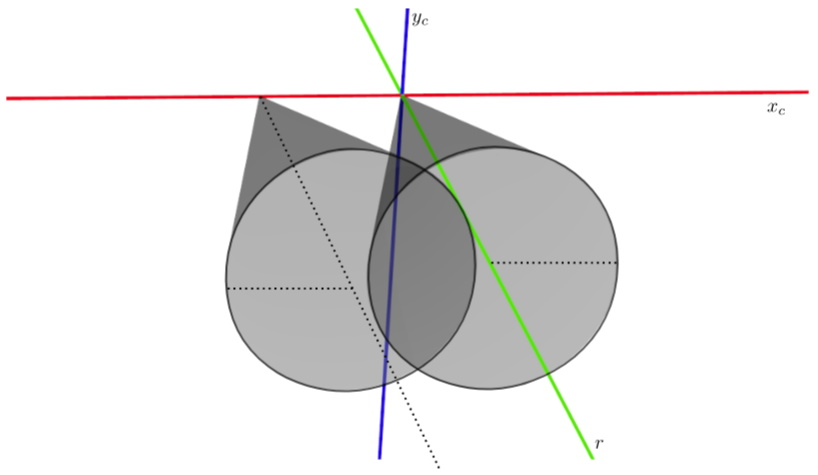</center>

1. Pogosto lahko obravnavamo problem iskanja krožnic, ko imamo radij že poznan. Kakšna je v tem primeru enačba, ki jo ena točka generira v parametričnem prostoru?

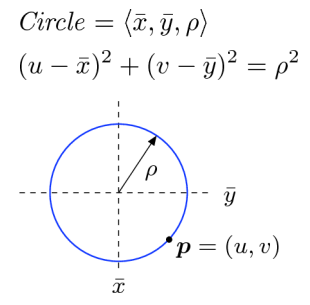

2. Na papirju rešite naslednji problem z uporabo Houghove transformacije: V sliki iščemo kroge s fiksnim radijem $r=4$. Obravnavajte točki $A = (4, 8)$ in $B = (8, 4)$. Za vsako točko napišite enačbo v parametričnem prostoru in narišite pripadajočo krivuljo. Kaj lahko povemo o točkah $A$ in $B$?

In [44]:
# TO-DO: Prilozite sliko/scan resitve

3. Implementacija algoritma je podobna, kot pri detekciji premic, gre enostavno za drugačno enačbo. V nadaljevanju preizkusite OpenCV implementacijo ``cv2.HoughCircles`` s pomočjo katere detektirajte kroge na slikah ``eclipse.jpg`` in ``coins.jpg``. V prvem primeru eksperimentirajte z vrednostmi radija med $45$ in $50$ slikovnih elementov, v drugem pa preizkusite radije nekje med $85$ in $90$ slikovnih elementov. Za izris krogov uporabite funkcijo ``cv2.circle``.

<br>
<center>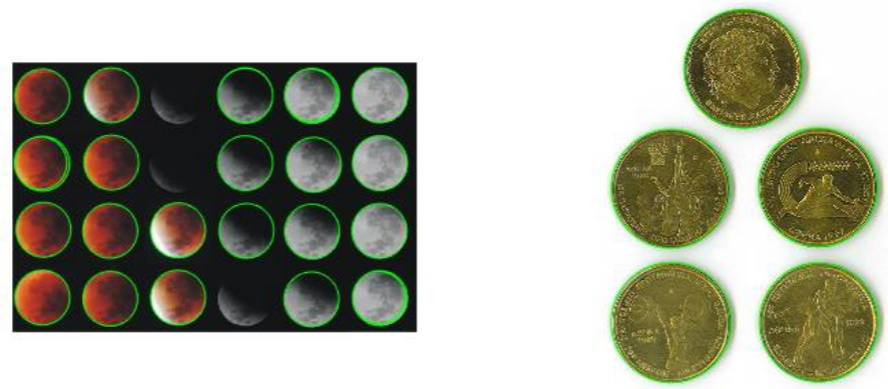</center>

<IPython.core.display.Javascript object>


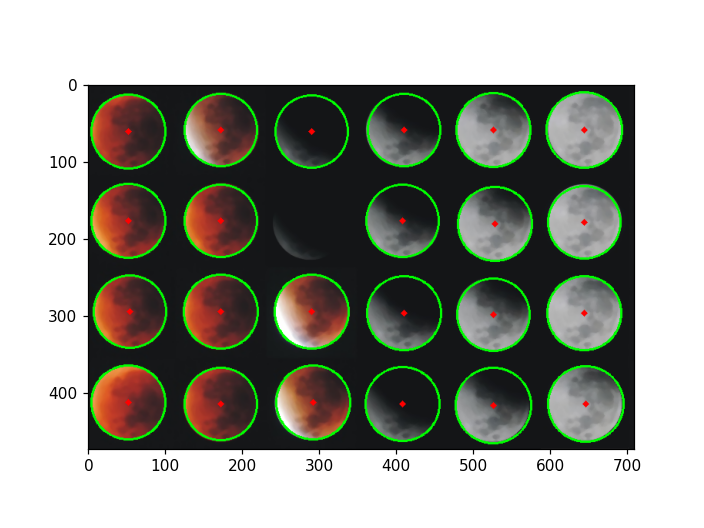

<IPython.core.display.Javascript object>


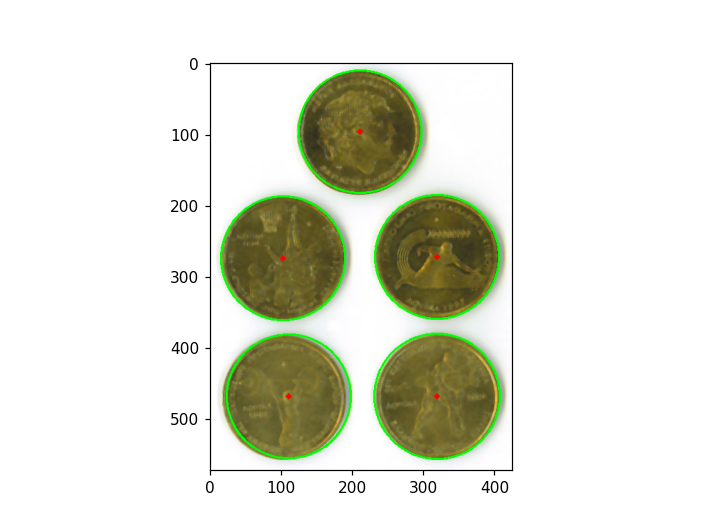

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



img1 = cv2.imread('material/eclipse.jpg')
img2 = cv2.imread('material/coins.jpg')

img1 = cv2.medianBlur(img1,5)
img2 = cv2.medianBlur(img2,5)

gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

circles1 = cv2.HoughCircles(gray1,cv2.HOUGH_GRADIENT,1,20, param1=50,param2=30,minRadius=45,maxRadius=50)
circles2 = cv2.HoughCircles(gray2,cv2.HOUGH_GRADIENT,1,20, param1=50,param2=30,minRadius=85,maxRadius=90)

circles1 = np.uint16(np.around(circles1))
circles2 = np.uint16(np.around(circles2))

for i in circles1[0,:]:
    cv2.circle(img1,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(img1,(i[0],i[1]),2,(0,0,255),3)
    
for i in circles2[0,:]:
    cv2.circle(img2,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(img2,(i[0],i[1]),2,(0,0,255),3)

    
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.figure()
plt.imshow(img_rgb1)

plt.figure()
plt.imshow(img_rgb2)

Ko dosežete zadovoljive rezultate preizkusite delovanje svojega algoritma še na živi sliki, t.j. sliki pridobljeni s pomočjo spletne kamere. Delovanje detekcije krogov preizkusite s pomočjo npr. kovancev na mizi.

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

# While zanka za posodabljanje pridobljene slike do prekinitve
while(True):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break
    
    img = cv2.medianBlur(frame,5)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,50,param1=50,param2=50,minRadius=0,maxRadius=60)
    if circles is not None:
        circles = np.uint16(np.around(circles))
    
    
    if circles is not None:
        for i in circles[0,:]:
            cv2.circle(frame,(i[0],i[1]),i[2],(0,255,0),2)
            cv2.circle(frame,(i[0],i[1]),2,(0,0,255),3)
    
    cv2.imshow('frame', frame)
    
    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()